In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Data Understanding


In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.shape

(614, 13)

In [6]:
test_data.shape

(367, 12)

In [7]:
train.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
386,LP002239,Male,No,0,Not Graduate,No,2346,1600.0,132.0,360.0,1.0,Semiurban,Y
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
225,LP001751,Male,Yes,0,Graduate,No,3250,0.0,170.0,360.0,1.0,Rural,N
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y
437,LP002401,Male,Yes,0,Graduate,No,2213,1125.0,NaN,360.0,1.0,Urban,Y


In [8]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
train.isnull().mean()*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [12]:
test_data.isnull().mean()*100

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

In [13]:
train.duplicated().sum()

np.int64(0)

In [14]:
test_data.duplicated().sum()

np.int64(0)

# Data Cleaning

In [15]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
train = train.drop(columns=["Loan_ID"])
test = test_data.drop(columns=["Loan_ID"])

In [17]:
train["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [18]:
train["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [19]:
train["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [20]:
train["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [21]:
train["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [22]:
train["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [23]:
train["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [24]:
train["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [25]:
train["Loan_Status"].nunique()

2

### Null Value Imputation 1

In [26]:
train["Gender"].mode()

0    Male
Name: Gender, dtype: object

In [27]:
train["Gender"] = train["Gender"].fillna(train["Gender"].mode()[0])

In [28]:
train["Married"].mode()

0    Yes
Name: Married, dtype: object

In [29]:
train["Married"] = train["Married"].fillna(train["Married"].mode()[0])

In [30]:
train["Dependents"] = train["Dependents"].str.replace("+","")

In [31]:
train["Dependents"].unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [32]:
train["Dependents"].mode()

0    0
Name: Dependents, dtype: object

In [33]:
train["Dependents"] = train["Dependents"].fillna(train["Dependents"].mode()[0])

In [34]:
train["Self_Employed"].mode()

0    No
Name: Self_Employed, dtype: object

In [35]:
train["Self_Employed"] = train["Self_Employed"].fillna(train["Self_Employed"].mode()[0])

In [36]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [37]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
from sklearn.impute import KNNImputer

# Select the relevant columns for imputation
columns_for_imputation = ['LoanAmount', 'Credit_History', 'Loan_Amount_Term']
data_for_imputation = train[columns_for_imputation]

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5) 
imputed_data = imputer.fit_transform(data_for_imputation)

# Replace the imputed LoanAmount column back into the original dataset
train['LoanAmount'] = imputed_data[:, columns_for_imputation.index('LoanAmount')]
train['Credit_History'] = imputed_data[:, columns_for_imputation.index('Credit_History')]
train['Loan_Amount_Term'] = imputed_data[:, columns_for_imputation.index('Loan_Amount_Term')]

In [39]:
train.isnull().mean()*100

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [40]:
test["Gender"] = test["Gender"].fillna(test["Gender"].mode()[0])
test["Married"] = test["Married"].fillna(test["Married"].mode()[0])
test["Dependents"] = test["Dependents"].str.replace("+","")
test["Dependents"] = test["Dependents"].fillna(test["Dependents"].mode()[0])
test["Self_Employed"] = test["Self_Employed"].fillna(test["Self_Employed"].mode()[0])
# test["LoanAmount"] = test["LoanAmount"].fillna(test["LoanAmount"].mean())
# test["Loan_Amount_Term"] = test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mean())
# test["Credit_History"] = test["Credit_History"].fillna(test["Credit_History"].mean())

In [41]:
# Select the relevant columns for imputation
columns_for_imputation_test = ['LoanAmount', 'Credit_History', 'Loan_Amount_Term']
data_for_imputation_test = test[columns_for_imputation_test]

# Apply KNN Imputer
imputer_test = KNNImputer(n_neighbors=5) 
imputed_data_test = imputer_test.fit_transform(data_for_imputation_test)

# Replace the imputed LoanAmount column back into the original dataset
test['LoanAmount'] = imputed_data_test[:, columns_for_imputation_test.index('LoanAmount')]
test['Credit_History'] = imputed_data_test[:, columns_for_imputation_test.index('Credit_History')]
test['Loan_Amount_Term'] = imputed_data_test[:, columns_for_imputation_test.index('Loan_Amount_Term')]

In [42]:
test.isnull().mean()*100

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
dtype: float64

# Exploratory Data Analysis

In [43]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,125.8,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [44]:
print(train["CoapplicantIncome"].dtypes)

float64


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### Univariant Analysis

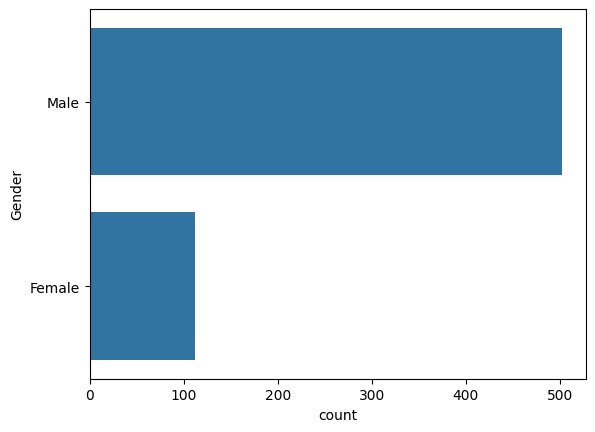

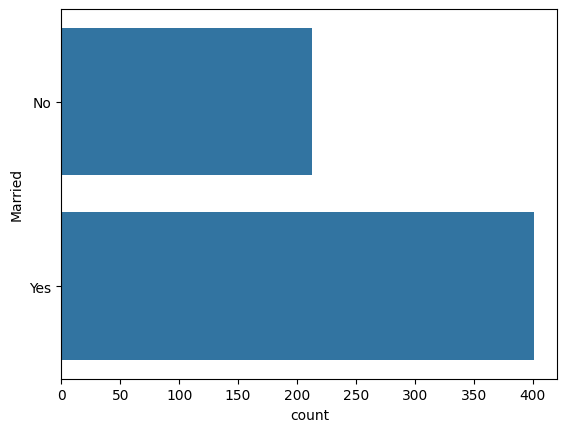

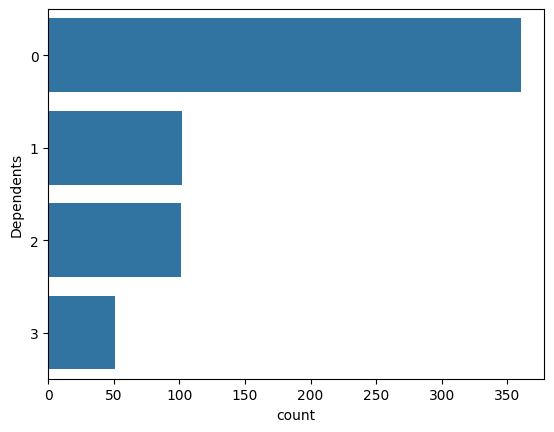

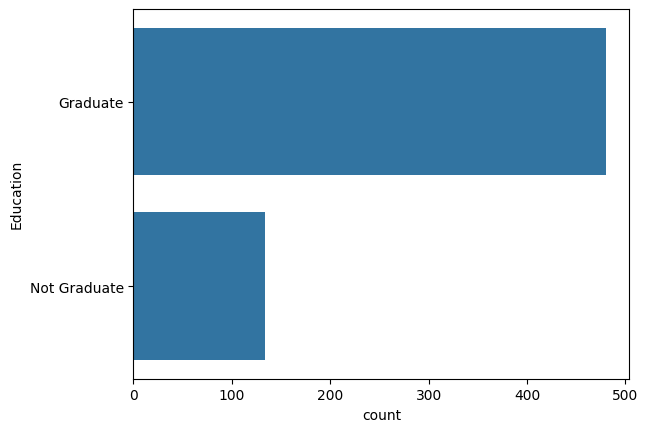

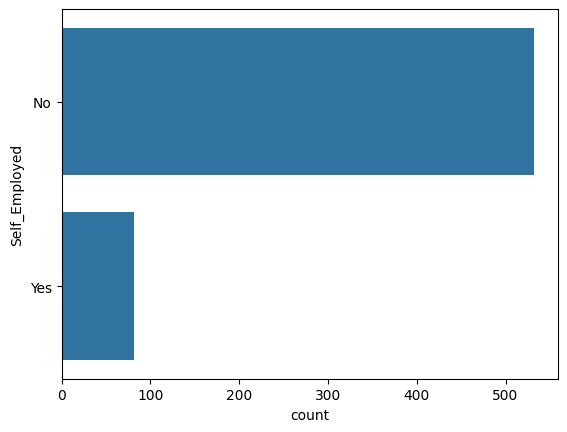

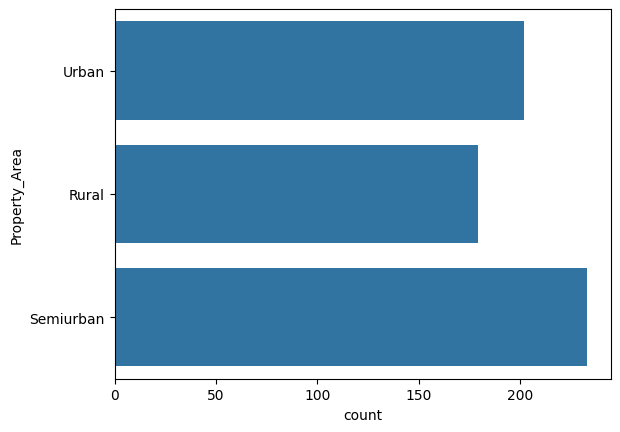

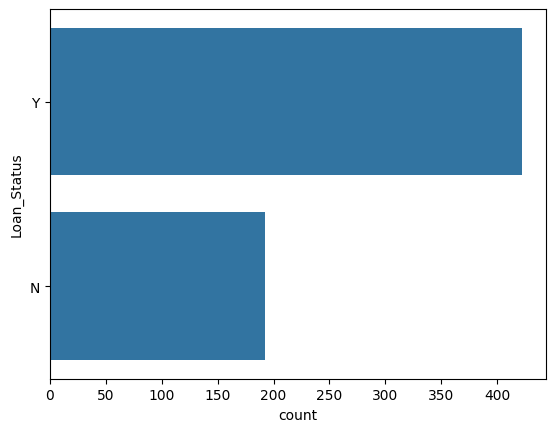

In [46]:
# Bar Plot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "object":
        plt.show(sns.countplot(train[train.columns[i]]))

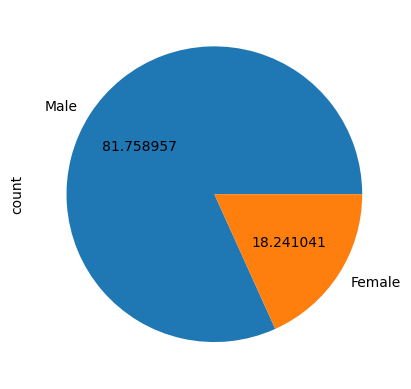

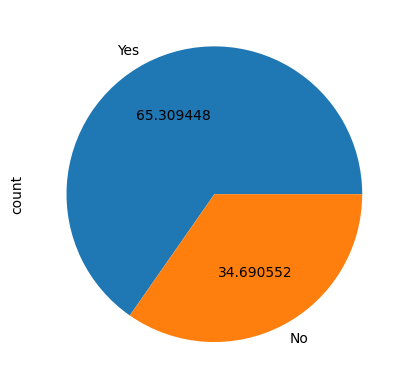

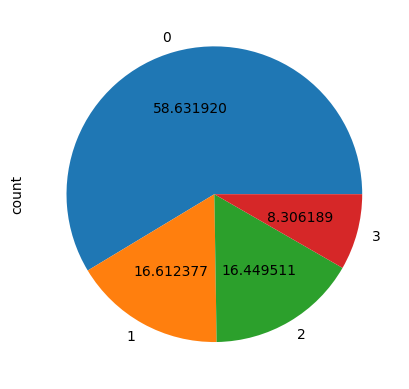

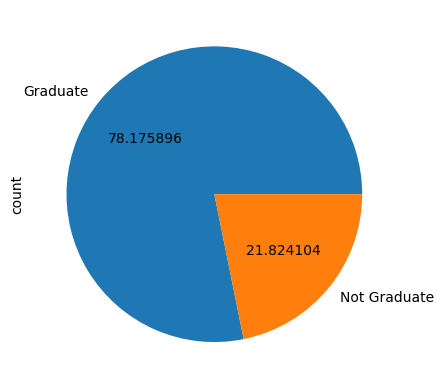

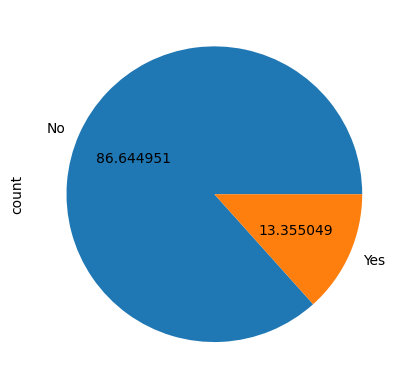

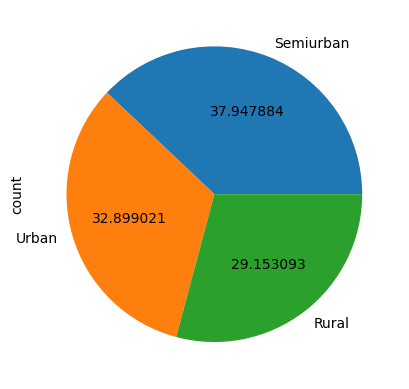

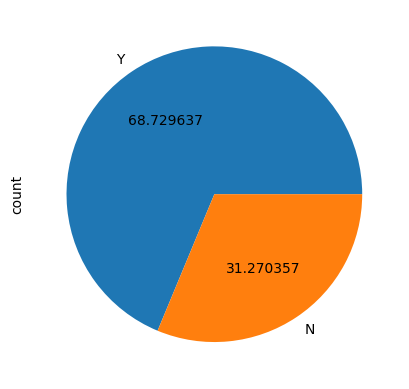

In [47]:
# Pie Chart
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "object":
        plt.show(train[train.columns[i]].value_counts().plot(kind="pie", autopct="%2f"))

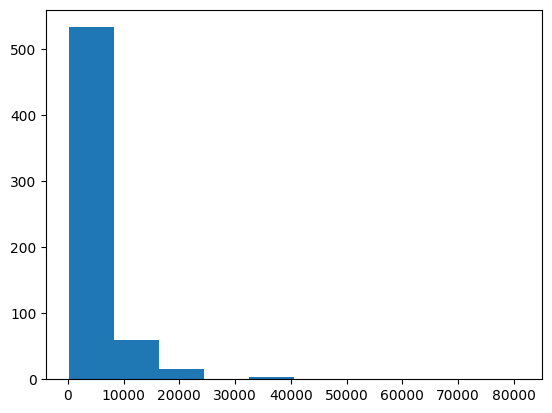

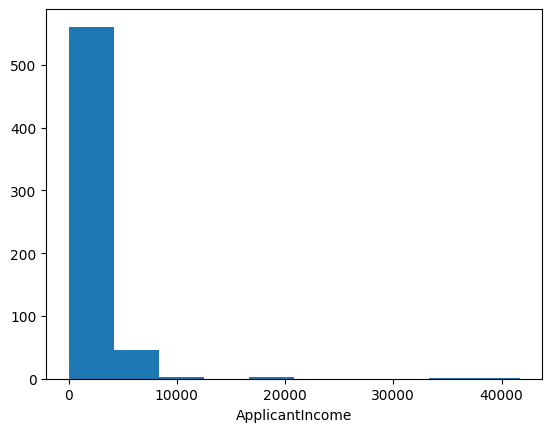

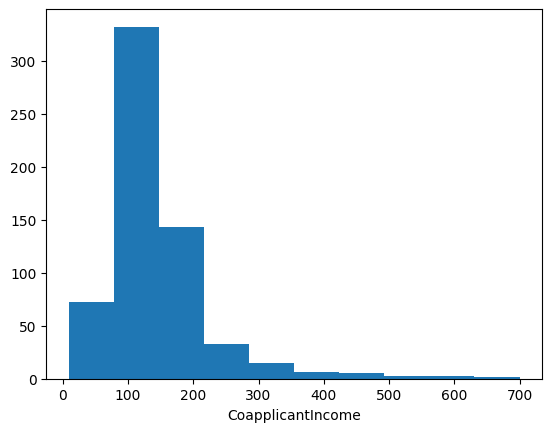

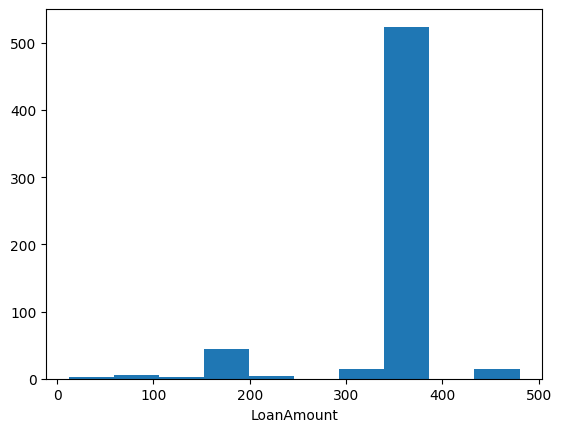

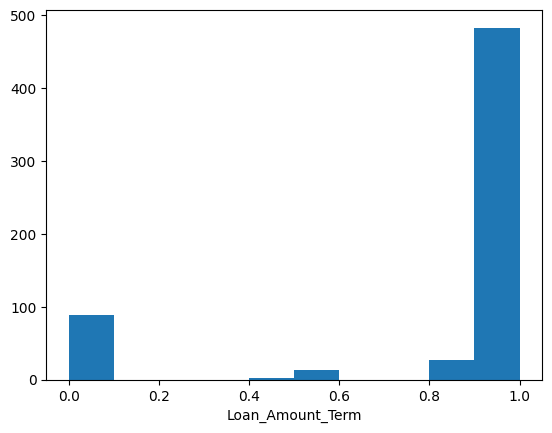

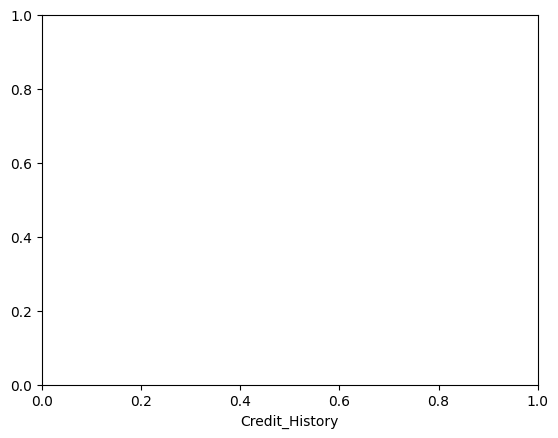

In [48]:
# Histogram
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(plt.hist(train[train.columns[i]]))
        plt.xlabel(train.columns[i])

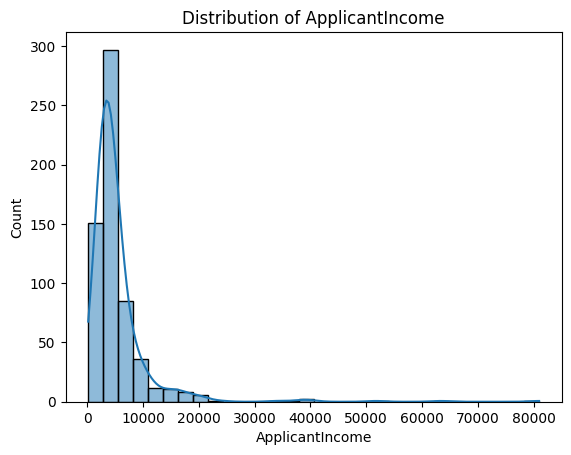

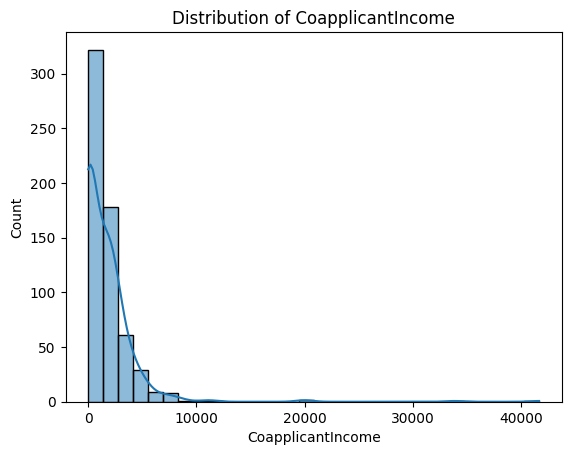

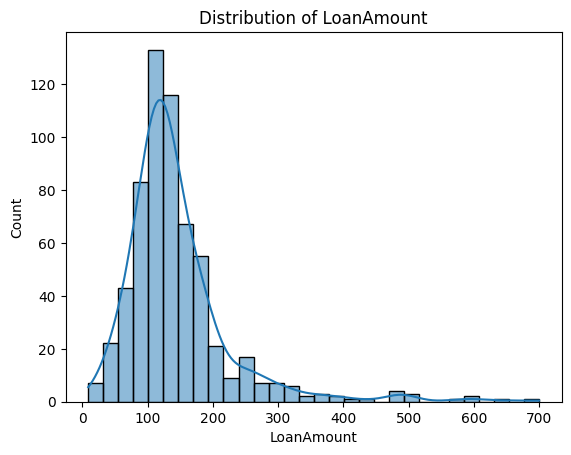

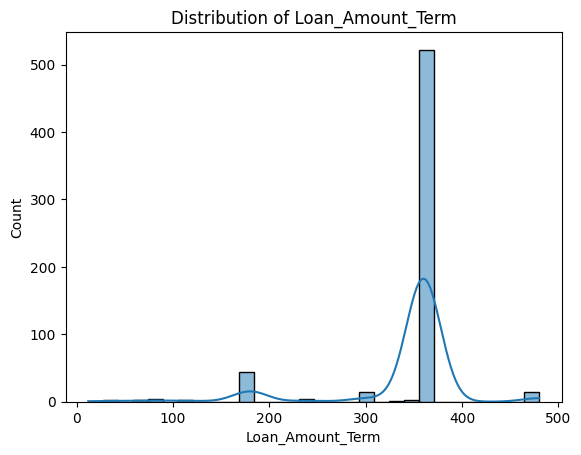

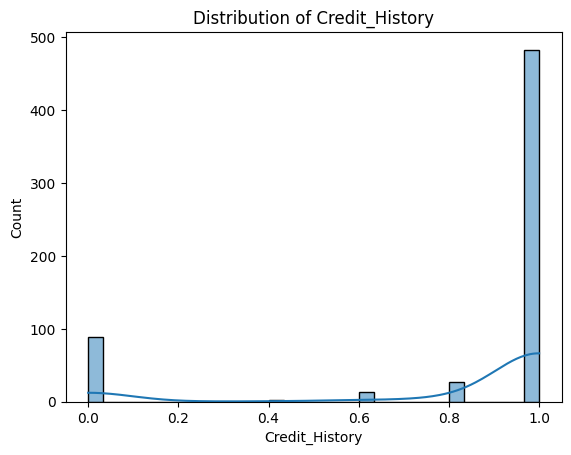

In [49]:
#HistPlot
for i in range(len(train.columns)):
    if train[train.columns[i]].dtypes in ["int64", "float64"]:
        sns.histplot(train[train.columns[i]], kde=True, bins=30)  # kde=True for density curve
        plt.xlabel(train.columns[i])
        plt.title(f'Distribution of {train.columns[i]}')
        plt.show()

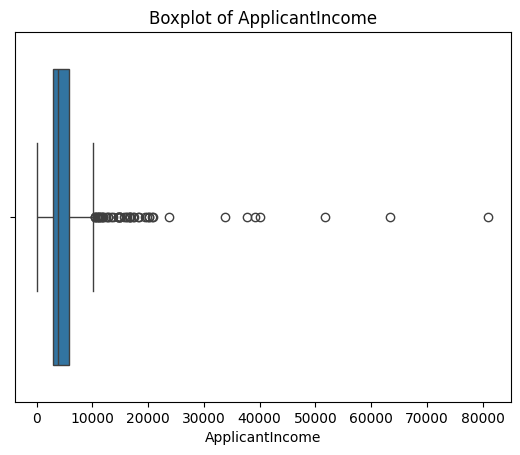

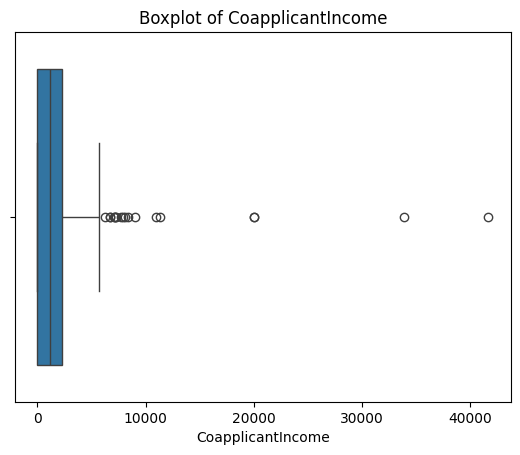

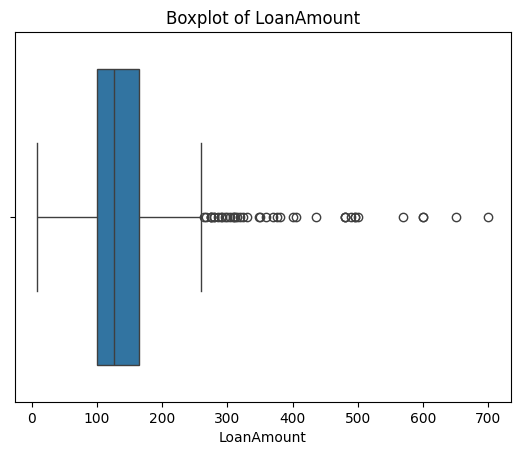

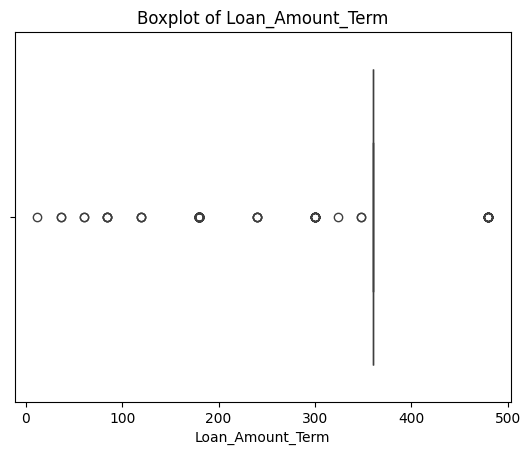

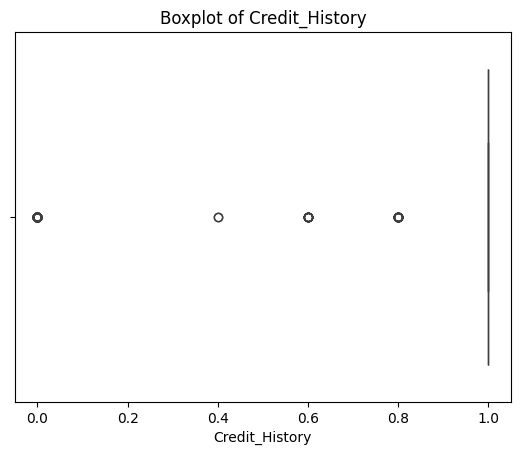

In [50]:
# Boxplot for numerical columns
for i in range(len(train.columns)):
    if train[train.columns[i]].dtypes in ["int64", "float64"]:
        sns.boxplot(x=train[train.columns[i]])
        plt.xlabel(train.columns[i])  # Label the x-axis
        plt.title(f'Boxplot of {train.columns[i]}')  # Add title for the boxplot
        plt.show()  # Display the plot

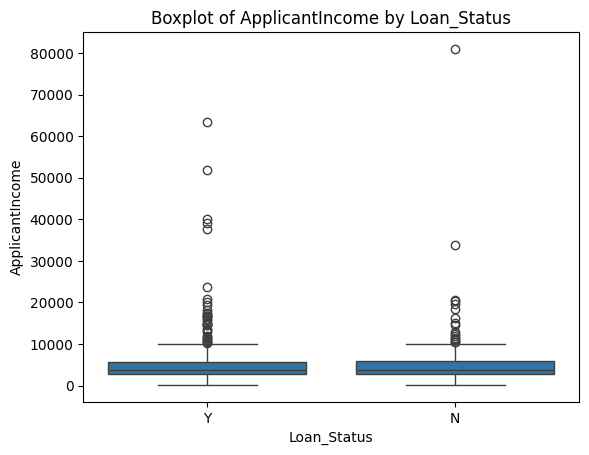

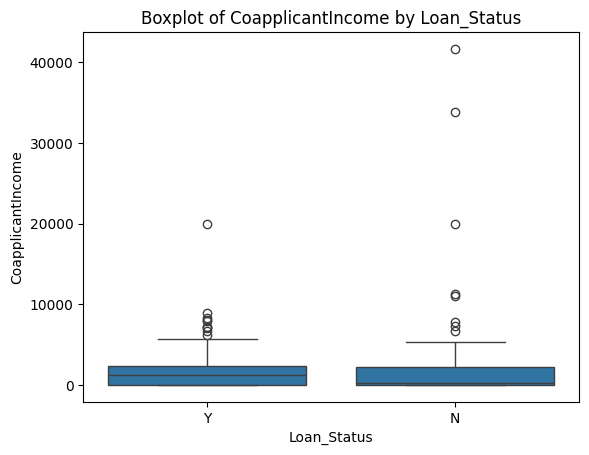

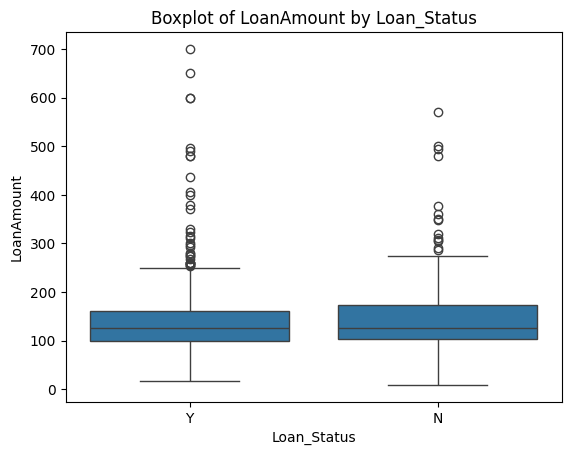

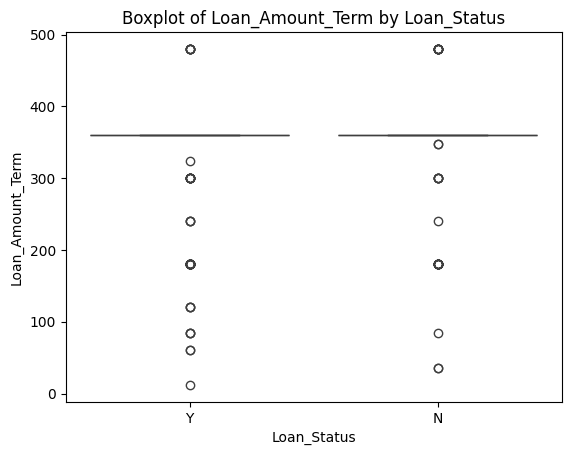

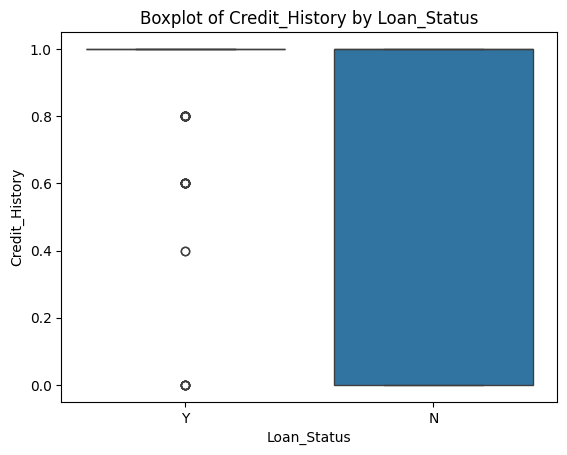

In [51]:
# Boxplot for numerical columns grouped by Loan_Status
for i in range(len(train.columns)):
    if train[train.columns[i]].dtypes in ["int64", "float64"]:
        sns.boxplot(x='Loan_Status', y=train.columns[i], data=train)  # Group by Loan_Status
        plt.ylabel(train.columns[i])  # Label the y-axis
        plt.title(f'Boxplot of {train.columns[i]} by Loan_Status')  # Add title
        plt.show()

### Bivariant Analysis

In [52]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,125.8,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Numeriacl - Numerical

##### 1. ScatterPlot

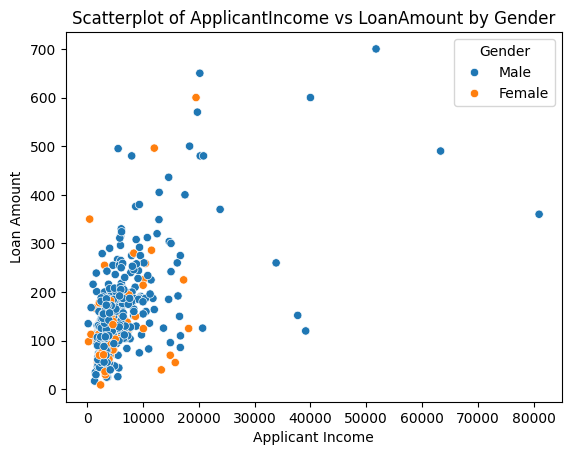

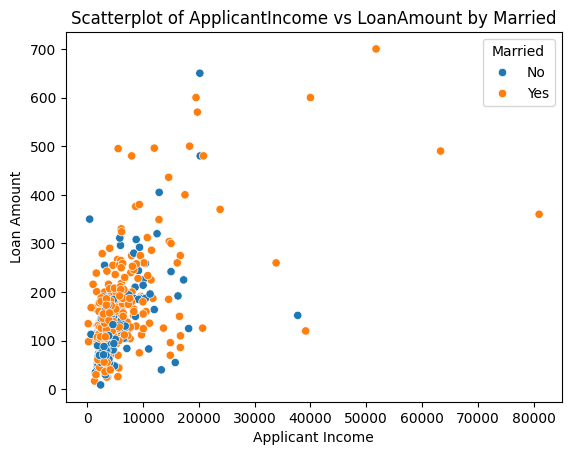

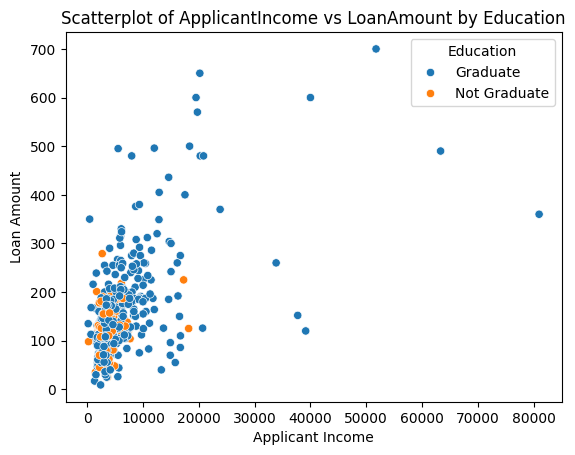

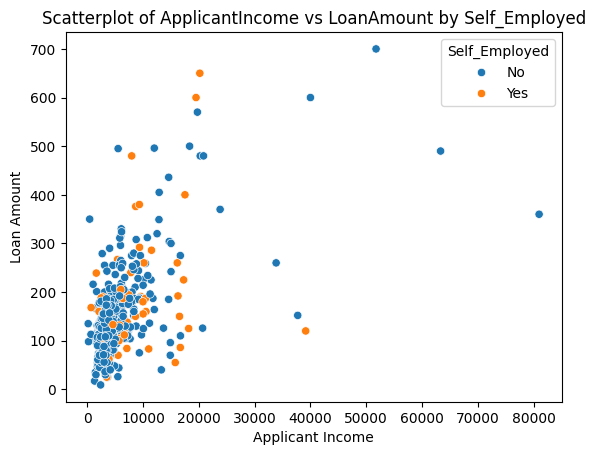

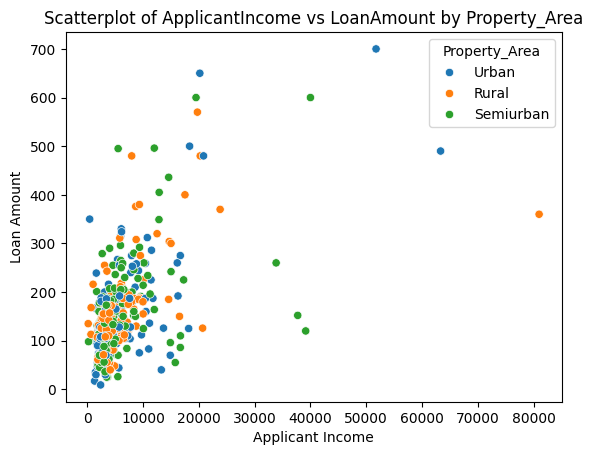

In [53]:
# Scatterplots for bivariate analysis with hue for different categorical variables
categorical_columns = ["Gender", "Married", "Education", "Self_Employed", "Property_Area"]

for col in categorical_columns:
    sns.scatterplot(x=train["ApplicantIncome"], y=train["LoanAmount"], hue=train[col])
    plt.xlabel("Applicant Income")
    plt.ylabel("Loan Amount")
    plt.title(f"Scatterplot of ApplicantIncome vs LoanAmount by {col}")
    plt.legend(title=col)  # Add legend with title
    plt.show()

##### 2. Line PLot

In [54]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,125.8,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
train["Loan_Amount_Term"].unique()

array([360., 120., 240., 180.,  60., 300., 348., 480.,  36.,  84., 324.,
        12.])

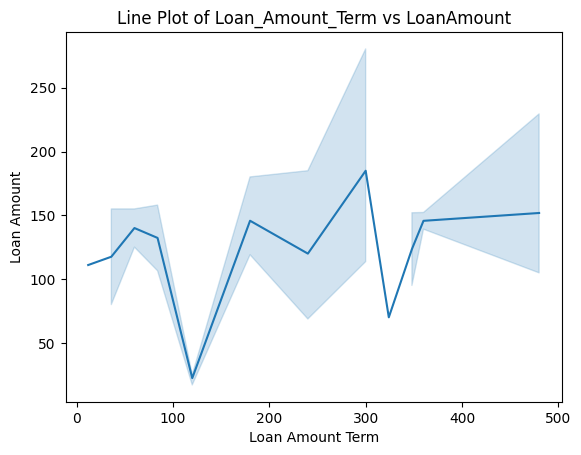

In [56]:
# Line plot for Loan_Amount_Term vs LoanAmount
sns.lineplot(x=train["Loan_Amount_Term"], y=train["LoanAmount"])

plt.xlabel("Loan Amount Term")  # Label for x-axis
plt.ylabel("Loan Amount")       # Label for y-axis
plt.title("Line Plot of Loan_Amount_Term vs LoanAmount")  # Title of the plot
plt.show()

#### Numericaal - Categorical 

In [57]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,125.8,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


1. Bar PLot

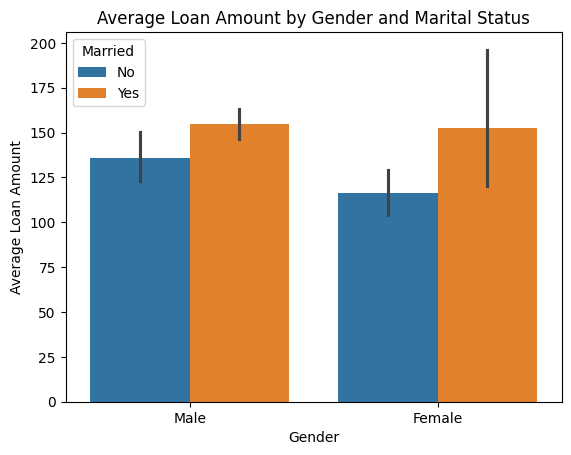

In [58]:
# Bar plot: Gender vs LoanAmount, grouped by Married status
sns.barplot(x=train["Gender"], y=train["LoanAmount"], hue=train["Married"])
plt.xlabel("Gender")
plt.ylabel("Average Loan Amount")
plt.title("Average Loan Amount by Gender and Marital Status")
plt.legend(title="Married")
plt.show()

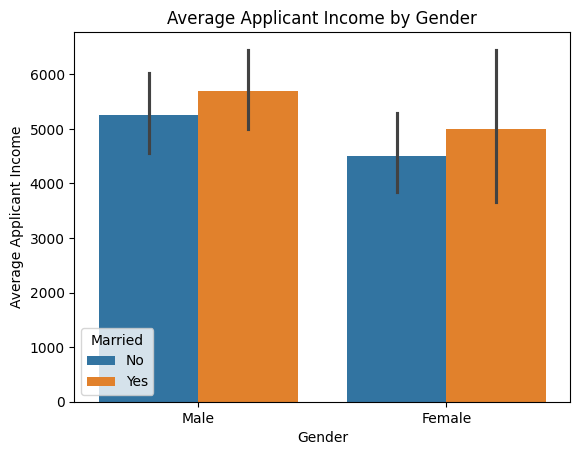

In [59]:
# Bar plot: Gender vs ApplicantIncome
sns.barplot(x=train["Gender"], y=train["ApplicantIncome"], hue=train["Married"])  # Removed hue
plt.xlabel("Gender")
plt.ylabel("Average Applicant Income")
plt.title("Average Applicant Income by Gender")
plt.show()

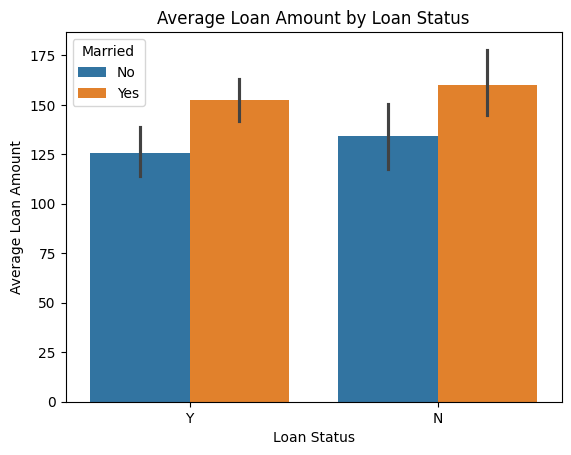

In [60]:
# Bar plot: Loan_Status vs LoanAmount
sns.barplot(x=train["Loan_Status"], y=train["LoanAmount"], hue=train["Married"])  # Removed hue
plt.xlabel("Loan Status")
plt.ylabel("Average Loan Amount")
plt.title("Average Loan Amount by Loan Status")
plt.show()

In [61]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,125.8,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### 2. Box Plot

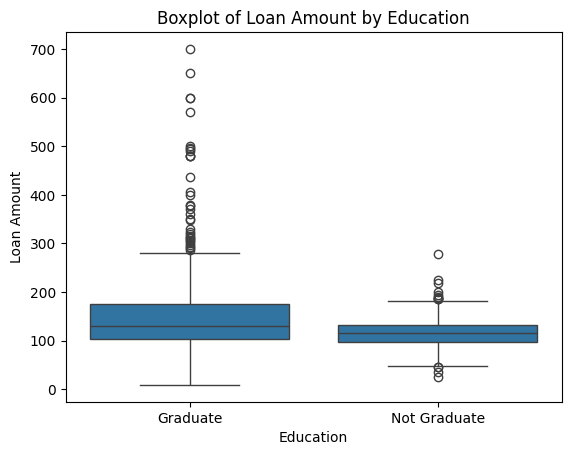

In [62]:
# Boxplot: Education vs LoanAmount
sns.boxplot(x=train["Education"], y=train["LoanAmount"])
plt.xlabel("Education")
plt.ylabel("Loan Amount")
plt.title("Boxplot of Loan Amount by Education")
plt.show()

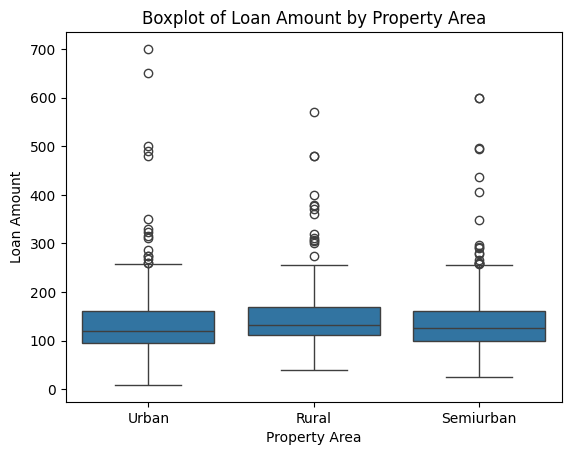

In [63]:
# Boxplot: Property_Area vs LoanAmount
sns.boxplot(x=train["Property_Area"], y=train["LoanAmount"])
plt.xlabel("Property Area")
plt.ylabel("Loan Amount")
plt.title("Boxplot of Loan Amount by Property Area")
plt.show()

In [64]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,125.8,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


3. Dist Plot

/tmp/ipykernel_6209/2387292668.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train[train["Gender"] == "Male"], x="LoanAmount", label="Male", shade=True)
/tmp/ipykernel_6209/2387292668.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train[train["Gender"] == "Female"], x="LoanAmount", label="Female", shade=True)


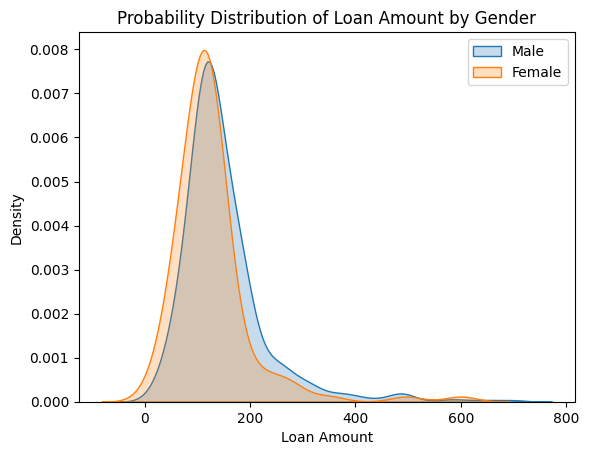

In [65]:
# Probability distribution of Loan Amount for Male
sns.kdeplot(data=train[train["Gender"] == "Male"], x="LoanAmount", label="Male", shade=True)

# Probability distribution of Loan Amount for Female
sns.kdeplot(data=train[train["Gender"] == "Female"], x="LoanAmount", label="Female", shade=True)

# Labels and Title
plt.xlabel("Loan Amount")
plt.ylabel("Density")
plt.title("Probability Distribution of Loan Amount by Gender")
plt.legend()
plt.show()

#### Categorical - Categorical

In [66]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,125.8,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##### 1. HeatMap

<Axes: xlabel='Loan_Status', ylabel='Gender'>

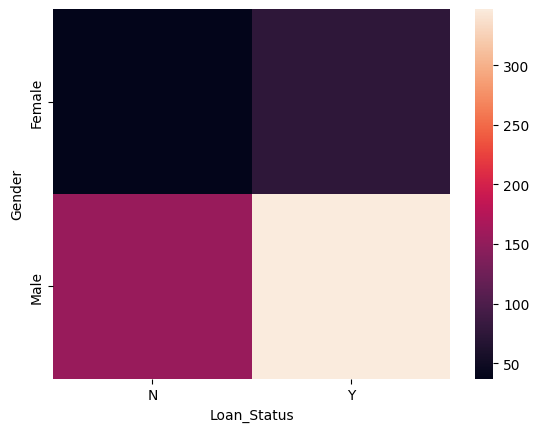

In [67]:
sns.heatmap(pd.crosstab(train["Gender"], train["Loan_Status"]))

<Axes: xlabel='Loan_Status', ylabel='Education'>

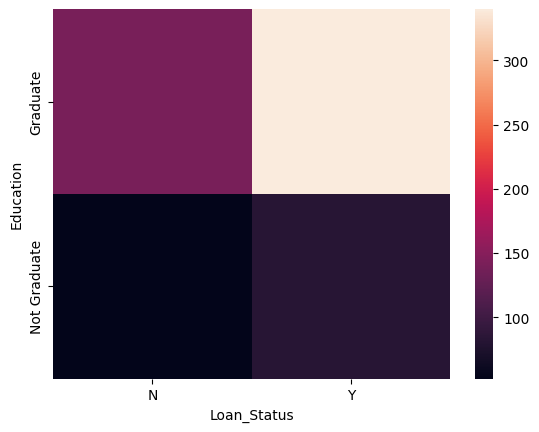

In [68]:
sns.heatmap(pd.crosstab(train["Education"], train["Loan_Status"]))

<Axes: xlabel='Loan_Status', ylabel='Property_Area'>

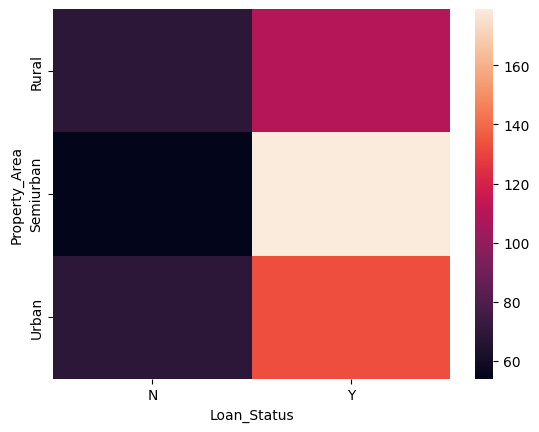

In [69]:
sns.heatmap(pd.crosstab(train["Property_Area"], train["Loan_Status"]))

In [70]:
#train.pivot_table(values="Depentents",index="ApplicantIncome", columns="LoanAmount")

##### 2. ClusterMap

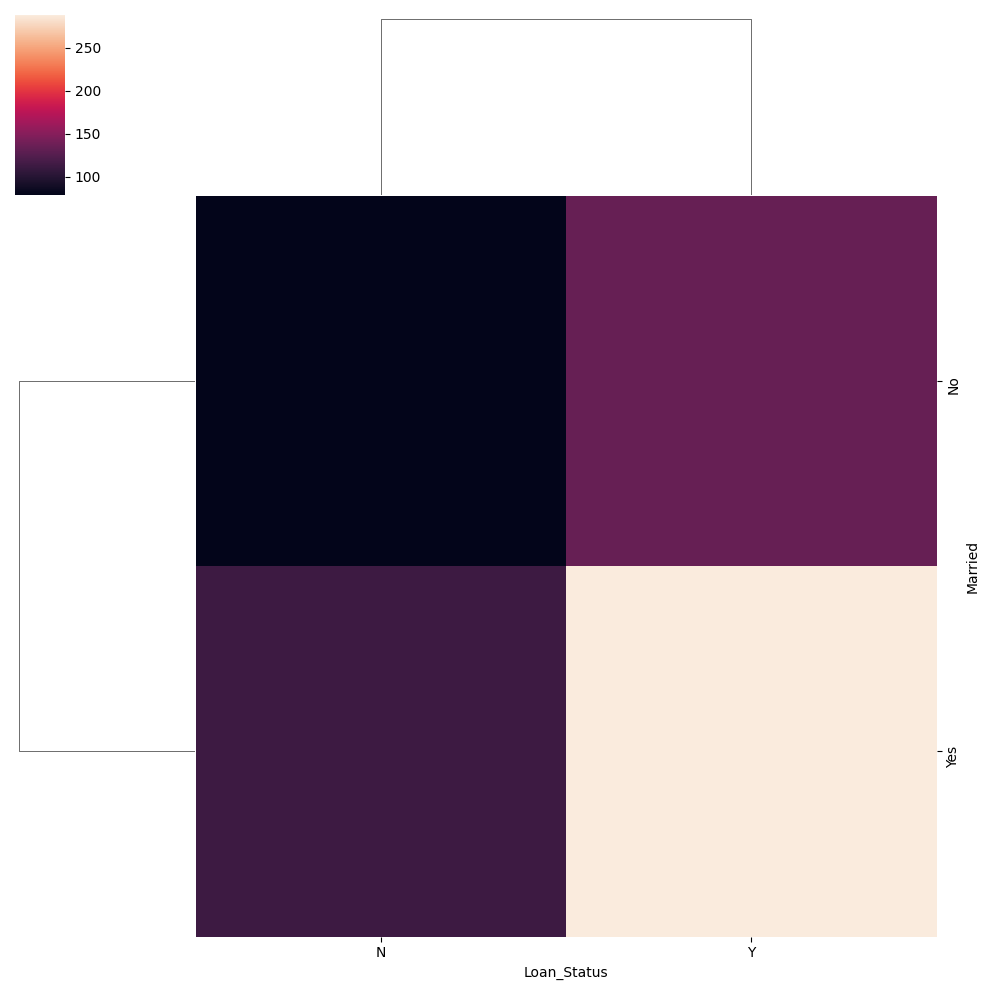

In [71]:
sns.clustermap(pd.crosstab(train["Married"], train["Loan_Status"]))

#### Multivariant Analysis

In [72]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,125.8,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


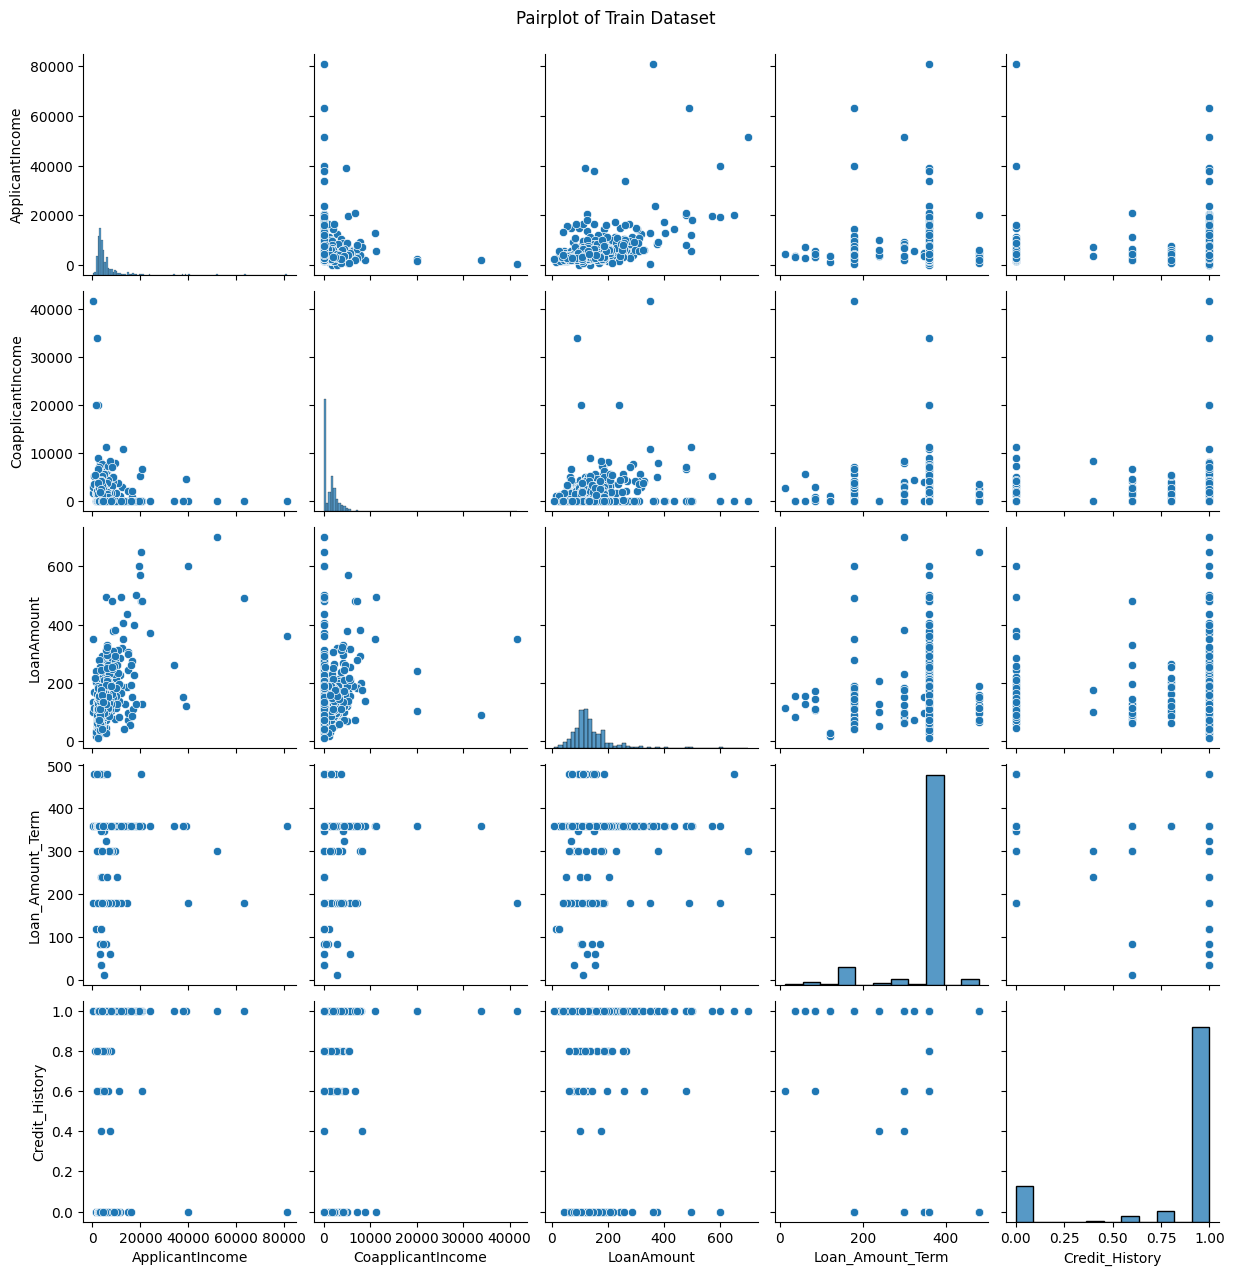

In [73]:
# Pairplot without hue
sns.pairplot(train)
plt.suptitle("Pairplot of Train Dataset", y=1.02)  # Add title
plt.show()

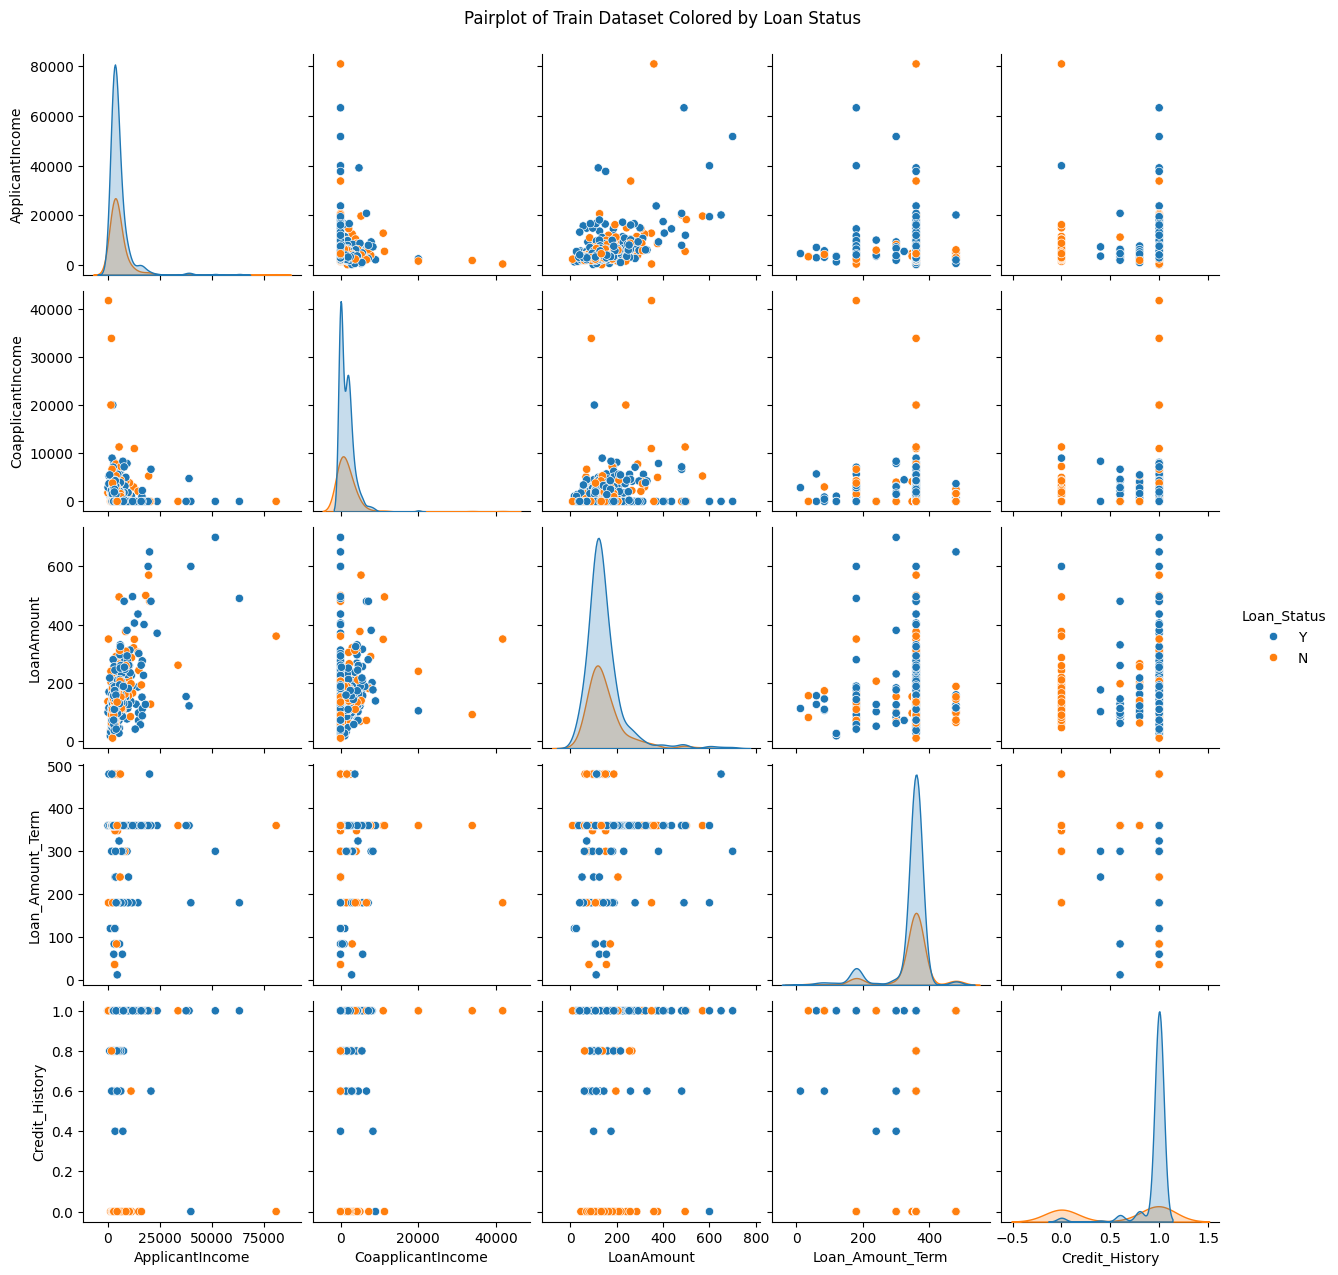

In [74]:
# Pairplot with hue for a categorical feature (example: Loan_Status or Gender)
sns.pairplot(train, hue="Loan_Status")  # or use any categorical column like "Gender"
plt.suptitle("Pairplot of Train Dataset Colored by Loan Status", y=1.02)
plt.show()

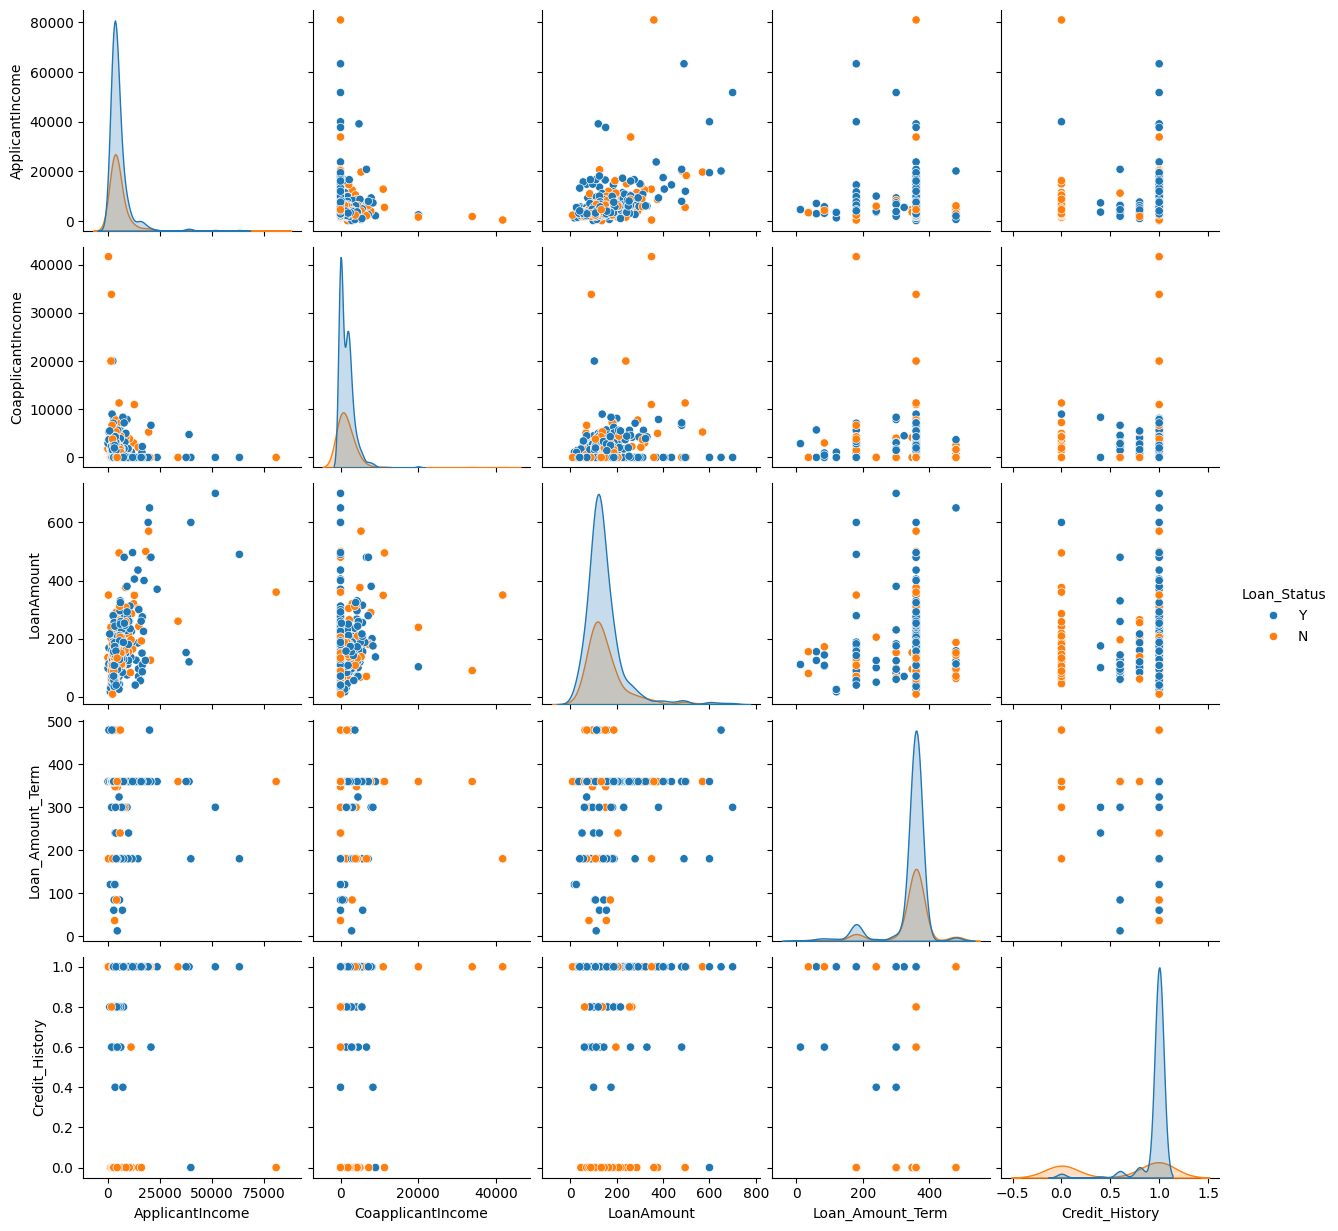

In [75]:
sns.pairplot(train, hue="Loan_Status", diag_kind="kde")

In [76]:
train.shape

(614, 12)

In [77]:
test.shape

(367, 11)

# Feature Transformation

##### 1. Outlier Detection

In [78]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,125.8,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


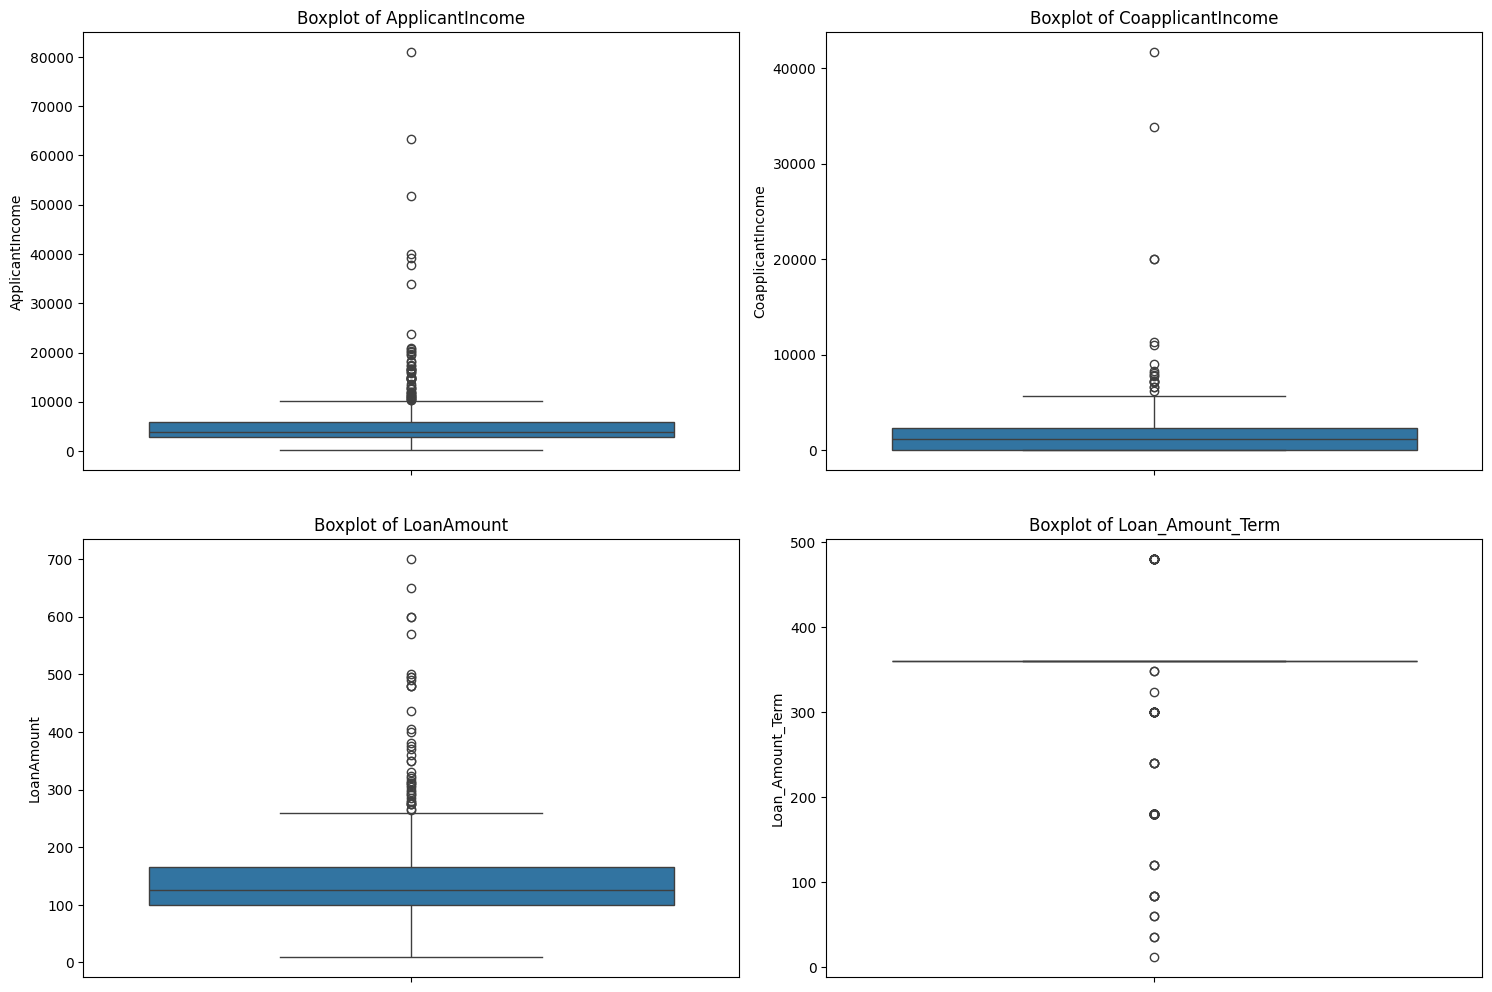

In [79]:
# Drop categorical and irrelevant columns to work with numeric data
data1 = train.drop(columns=["Loan_Status", "Gender", "Married", "Education", 
                            "Self_Employed", "Property_Area", "Credit_History", "Dependents"], axis=1)

# Create subplots for boxplots
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))  # Adjusted figsize for clarity
ax = ax.flatten()  # Flatten the 2D array of axes

# Loop through each numeric column to plot a boxplot
index = 0
for col in data1.columns:
    sns.boxplot(y=data1[col], ax=ax[index])
    ax[index].set_title(f"Boxplot of {col}")
    index += 1

plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=3.0)  # Adjust padding for better spacing
plt.show()

##### 2. Handling Categorical Features 

##### 3. Feature Scaling - Normalization

In [80]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,125.8,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [81]:
x = train.iloc[:,:-1]
y = train.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [82]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
222,Male,No,0,Graduate,No,2971,2791.0,144.0,360.0,1.0,Semiurban
281,Male,Yes,0,Graduate,No,3927,800.0,112.0,360.0,1.0,Semiurban
372,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural
32,Male,No,1,Graduate,Yes,4692,0.0,106.0,360.0,1.0,Rural
204,Male,Yes,2,Not Graduate,No,3917,0.0,124.0,360.0,1.0,Semiurban


In [83]:
y_train.head()

222    Y
281    Y
372    Y
32     N
204    Y
Name: Loan_Status, dtype: object

In [84]:
# Define column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ("categorical", OneHotEncoder(drop="first", sparse_output=False), ["Gender", "Married", "Education", "Self_Employed", "Property_Area"]),
        ("scaler", StandardScaler(), ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"]),
    ],
    remainder="passthrough"  # Keep other columns as they are
)

In [85]:
# Create pipeline with column transformer and scaling
pipeline = Pipeline(steps=[
    ("preprocessor", column_transformer)
])

In [86]:
x_train = pipeline.fit_transform(x_train)  # Fit and transform training data
x_test = pipeline.transform(x_test)

In [87]:
test_transformed = pipeline.transform(test)

In [88]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [89]:
# Sampling the Data
smote = SMOTE(sampling_strategy="minority")
x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)

In [90]:
y_train.shape

(491,)

In [91]:
y_train_sm.shape

(676,)

In [92]:
x_train_sm.shape

(676, 12)

In [93]:
x_train.shape

(491, 12)

# Model Building

**Logistic Regression**

In [94]:
logr = LogisticRegression()
model = logr.fit(x_train_sm,y_train_sm)
pred = model.predict(x_test)
accuracy_score(y_test, pred)*100

74.79674796747967

In [95]:
score = []
for i in range(5000):
    x = train.iloc[:,:-1]
    y = train.iloc[:,-1]

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    x_train = pipeline.fit_transform(x_train)
    x_test = pipeline.transform(x_test)
    
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)
    
    smote = SMOTE(sampling_strategy="minority")
    x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)
    
    logr = LogisticRegression()
    logr.fit(x_train_sm,y_train_sm)
    pred = logr.predict(x_test)
    score.append(accuracy_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])
best_score = np.argmax(score)

i=  4747
86.1788617886179


In [96]:
logr = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=best_score)
    
x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

smote = SMOTE(sampling_strategy="minority")
x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)

model1 = logr.fit(x_train_sm,y_train_sm)
pred = model1.predict(x_test)
accuracy_score(y_test, pred)*100

81.30081300813008

**Decision Tree**

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Decision Tree model
dec_tree = DecisionTreeClassifier(random_state=2)

# Train the model on the training data
dec_tree.fit(x_train_sm, y_train_sm)

# Make predictions on the test data
y_pred = dec_tree.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 64.22764227642277
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.56      0.48        36
           1       0.79      0.68      0.73        87

    accuracy                           0.64       123
   macro avg       0.60      0.62      0.60       123
weighted avg       0.68      0.64      0.65       123



In [99]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for tuning
param_grid = {
    "max_depth": [3, 5, 10, 20, None],              # Depth of the tree
    "min_samples_split": [2, 5, 10],                # Minimum samples required to split an internal node
    "min_samples_leaf": [1, 2, 4],                  # Minimum samples required at a leaf node
    "max_features": [None, 'sqrt', 'log2'],         # Number of features to consider at each split
    "criterion": ["gini", "entropy"],              # Quality of the split (Gini or Entropy)
    "max_leaf_nodes": [None, 10, 20, 50]            # Limit the number of leaf nodes
}

In [100]:
grid_dec_tree_model = DecisionTreeClassifier(random_state=2)

# Initialize GridSearchCV with cross-validation (cv=5) and scoring based on accuracy
grid_search = GridSearchCV(estimator=grid_dec_tree_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [101]:
# Fit the grid search
grid_search.fit(x_train_sm, y_train_sm)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 20, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [102]:
# Best hyperparameters from the grid search
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [103]:
# Make predictions with the best model
dec_tree_grid_best_model = grid_search.best_estimator_
y_pred = dec_tree_grid_best_model.predict(x_test)

In [104]:
# Evaluate the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Model Accuracy: 75.60975609756098
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.61      0.59        36
           1       0.84      0.82      0.83        87

    accuracy                           0.76       123
   macro avg       0.71      0.71      0.71       123
weighted avg       0.76      0.76      0.76       123



In [108]:
from sklearn.metrics import roc_auc_score

# ROC-AUC Score
y_prob = dec_tree_grid_best_model.predict_proba(x_test)[:, 1]  # Probability estimates for positive class
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc}")
# AUC above 0.8 is typically considered good.
# AUC above 0.9 is excellent.

ROC-AUC: 0.7024265644955301


In [120]:
# Extract categorical feature names
categorical_features = column_transformer.named_transformers_["categorical"].get_feature_names_out(
    ["Gender", "Married", "Education", "Self_Employed", "Property_Area"]
)

# Numerical features from StandardScaler
numerical_features = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"]

# Include columns passed through by 'remainder="passthrough"' (if any)
remaining_features = list(column_transformer.transformers_[-1][-1])  # Columns passed through untouched

# Combine all features
all_feature_names = list(categorical_features) + numerical_features + remaining_features

print(f"Final feature names: {all_feature_names}")
print(f"Total number of features: {len(all_feature_names)}")

Final feature names: ['Gender_Male', 'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 2]
Total number of features: 12


/home/mohit/myDsenv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


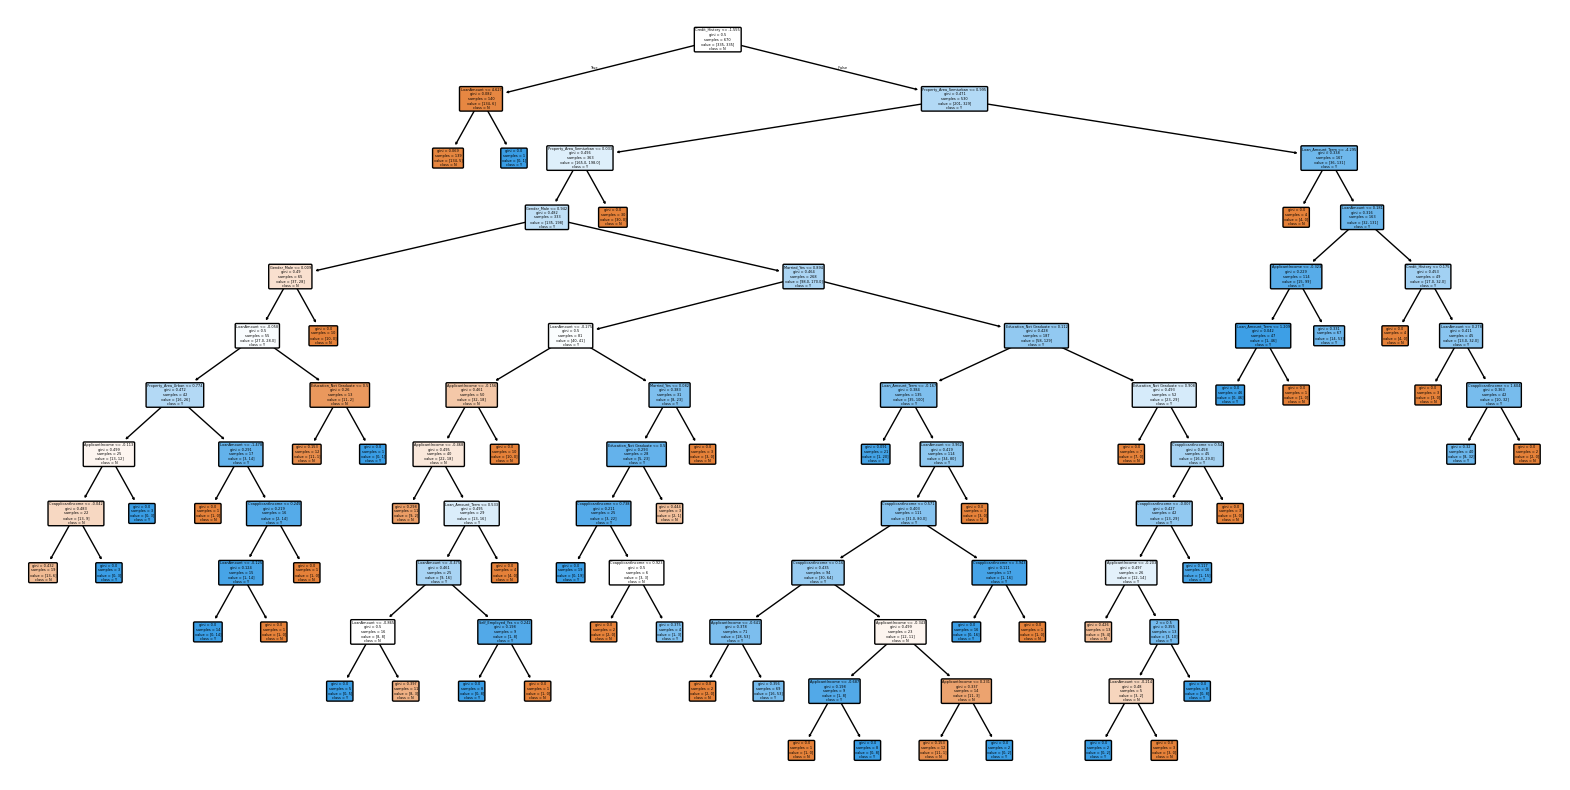

In [121]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    dec_tree_grid_best_model, 
    filled=True, 
    feature_names=all_feature_names,  # Use the corrected feature names
    class_names=le.classes_, 
    rounded=True
)
plt.show()

In [129]:
# Extract feature importances
importances = (dec_tree_grid_best_model.feature_importances_)*100

# Map importances to feature names
importance_df = pd.DataFrame({
    "Feature": all_feature_names,
    "Importance": importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)
importance_df.head()

,Feature,Importance
10,Credit_History,33.175697
4,Property_Area_Semiurban,13.889234
8,LoanAmount,13.783304
6,ApplicantIncome,10.214864
7,CoapplicantIncome,9.580652


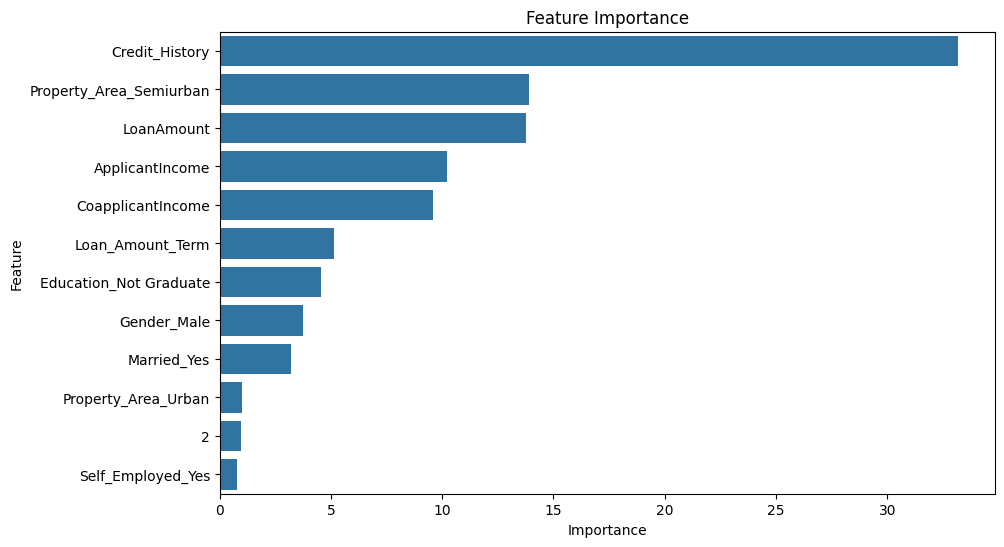

In [130]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

**XGBoost (Extreme Gradient Boosting)**

In [132]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

In [133]:
# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",  # Binary classification
    eval_metric="logloss",       # Evaluation metric
    use_label_encoder=False,     # Avoid label encoding warnings
    random_state=2
)

# Train the model
xgb_model.fit(x_train_sm, y_train_sm)

/home/mohit/myDsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:29:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=2, ...)

In [134]:
# Predict on the test set
y_pred = xgb_model.predict(x_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)*100
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(x_test)[:, 1])  # Use probabilities for ROC-AUC

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 77.23577235772358
ROC-AUC: 0.8135376756066411

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.67      0.63        36
           1       0.86      0.82      0.84        87

    accuracy                           0.77       123
   macro avg       0.73      0.74      0.73       123
weighted avg       0.78      0.77      0.78       123

Confusion Matrix:
[[24 12]
 [16 71]]


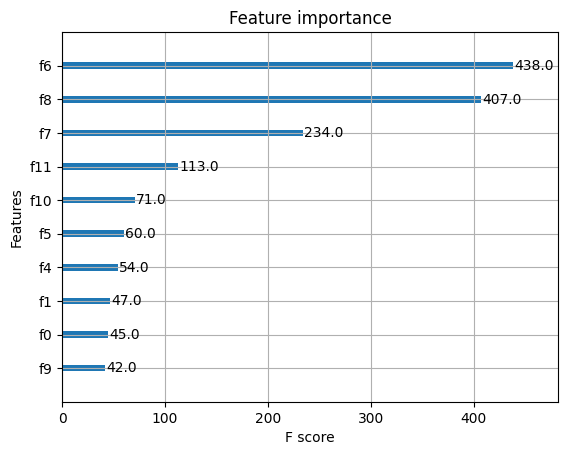

In [135]:
xgb.plot_importance(xgb_model, max_num_features=10, importance_type="weight")
plt.show()

In [141]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(
        objective="binary:logistic", eval_metric="logloss", use_label_encoder=False, random_state=2
    ),
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    verbose=2
)

grid_search.fit(x_train_sm, y_train_sm)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/home/mohit/myDsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:36:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mohit/myDsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:36:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mohit/myDsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:36:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mohit/myDsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:36:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mohit/myDsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:36:04] WARNING: /workspace/sr

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=2, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [142]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best Accuracy Score: 0.8149253731343284


In [143]:
best_xgb_model = grid_search.best_estimator_

# Predict on test set
y_pred_best = best_xgb_model.predict(x_test)
roc_auc_best = roc_auc_score(y_test, best_xgb_model.predict_proba(x_test)[:, 1])

print(f"Optimized ROC-AUC: {roc_auc_best}")

Optimized ROC-AUC: 0.8231162196679438


In [147]:
cv_scores = cross_val_score(
    estimator=best_xgb_model,
    X=x_train_sm,
    y=y_train_sm,
    cv=5,
    scoring="roc_auc"
)

print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean ROC-AUC Score: {cv_scores.mean()}")

/home/mohit/myDsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:39:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mohit/myDsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:39:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mohit/myDsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:39:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mohit/myDsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:39:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mohit/myDsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:39:33] WARNING: /workspace/sr

Cross-Validation ROC-AUC Scores: [0.79059924 0.81933616 0.86455781 0.92515037 0.95165961]
Mean ROC-AUC Score: 0.8702606371129427


In [159]:
# Training ROC-AUC Score
y_train_pred_proba = best_xgb_model.predict_proba(x_train_sm)[:, 1]
train_roc_auc = roc_auc_score(y_train_sm, y_train_pred_proba)
print(f"Training ROC-AUC: {train_roc_auc}")

# Test ROC-AUC Score
y_test_pred_proba = best_xgb_model.predict_proba(x_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
print(f"Test ROC-AUC: {test_roc_auc}")

Training ROC-AUC: 1.0
Test ROC-AUC: 0.8231162196679438


In [157]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(
        objective="binary:logistic", 
        eval_metric="logloss", 
        use_label_encoder=False, 
        random_state=2,
        max_depth=3,          # Reduced depth
        n_estimators=50,      # Reduced number of trees
        gamma=0.1,            # Regularization
        alpha=0.5             # Regularization
    ),
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    verbose=1
)

grid_search.fit(x_train_sm, y_train_sm)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/home/mohit/myDsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:55:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mohit/myDsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:55:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mohit/myDsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:55:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mohit/myDsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:55:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mohit/myDsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:55:14] WARNING: /workspace/sr

GridSearchCV(cv=5,
             estimator=XGBClassifier(alpha=0.5, base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=0.1, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learn...
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=50,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [158]:
# Output best parameters from GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best Accuracy: 0.8059701492537312


In [160]:
tuned_xgb_model = grid_search.best_estimator_
# Training ROC-AUC Score
y_train_pred_proba = tuned_xgb_model.predict_proba(x_train_sm)[:, 1]
train_roc_auc = roc_auc_score(y_train_sm, y_train_pred_proba)
print(f"Training ROC-AUC: {train_roc_auc}")

# Test ROC-AUC Score
y_test_pred_proba = tuned_xgb_model.predict_proba(x_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
print(f"Test ROC-AUC: {test_roc_auc}")

Training ROC-AUC: 0.9919447538427267
Test ROC-AUC: 0.8215197956577267


/home/mohit/myDsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:42:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mohit/myDsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:42:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mohit/myDsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:42:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mohit/myDsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:42:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mohit/myDsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:42:20] WARNING: /workspace/sr

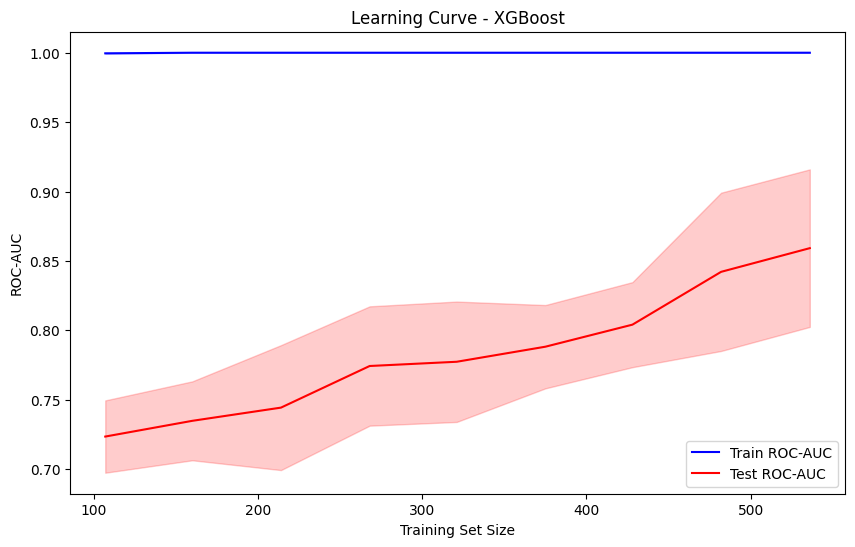

In [149]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    estimator=xgb_model, 
    X=x_train_sm, 
    y=y_train_sm, 
    cv=5,  # Use 5-fold cross-validation
    scoring='roc_auc', 
    n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)  # Vary training set size from 10% to 100%
)

# Calculate mean and standard deviation for plotting
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Train ROC-AUC", color='blue')
plt.plot(train_sizes, test_mean, label="Test ROC-AUC", color='red')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('ROC-AUC')
plt.title('Learning Curve - XGBoost')
plt.legend()
plt.show()

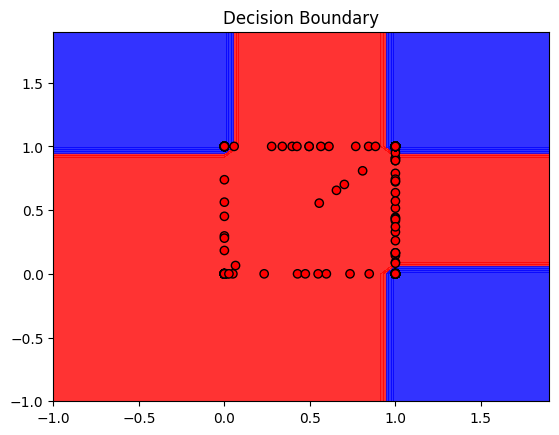

In [145]:
# Visualize the Decision Boundaries

# Select two features for visualization
x_train_sample = x_train_sm[:, :2]
x_test_sample = x_test[:, :2]

xgb_vis_model = xgb.XGBClassifier(objective="binary:logistic", random_state=2)
xgb_vis_model.fit(x_train_sample, y_train_sm)

# Plot decision boundary
x_min, x_max = x_train_sample[:, 0].min() - 1, x_train_sample[:, 0].max() + 1
y_min, y_max = x_train_sample[:, 1].min() - 1, x_train_sample[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = xgb_vis_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(("red", "blue")))
plt.scatter(x_train_sample[:, 0], x_train_sample[:, 1], c=y_train_sm, edgecolor="k", cmap=ListedColormap(("red", "blue")))
plt.title("Decision Boundary")
plt.show()

In [163]:
# Predict on the test set
y_pred = tuned_xgb_model.predict(x_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)*100
roc_auc = roc_auc_score(y_test, tuned_xgb_model.predict_proba(x_test)[:, 1])  # Use probabilities for ROC-AUC

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 81.30081300813008
ROC-AUC: 0.8215197956577267

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.61      0.66        36
           1       0.85      0.90      0.87        87

    accuracy                           0.81       123
   macro avg       0.78      0.75      0.76       123
weighted avg       0.81      0.81      0.81       123

Confusion Matrix:
[[22 14]
 [ 9 78]]


In [164]:
# # Save the model
# tuned_xgb_model.save_model("xgb_model.json")

# # Load the model
# loaded_model = xgb.XGBClassifier()
# loaded_model.load_model("xgb_model.json")

**Random Forest Classifier**

In [165]:
rf = RandomForestClassifier(n_estimators=150, max_depth=3, min_samples_split=4)
rf.fit(x_train_sm,y_train_sm)
pred = rf.predict(x_test)
accuracy_score(y_test, pred)*100

82.11382113821138

In [168]:
score = []
for i in range(500):
    x = train.iloc[:,:-1]
    y = train.iloc[:,-1]

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    x_train = pipeline.fit_transform(x_train)
    x_test = pipeline.transform(x_test)
    
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)
    
    smote = SMOTE(sampling_strategy="minority")
    x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)
    
    rfc = RandomForestClassifier(n_estimators=150, max_depth=3, min_samples_split=4, n_jobs=-1)
    rfc.fit(x_train_sm,y_train_sm)
    pred = rfc.predict(x_test)
    score.append(accuracy_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])
best_score = np.argmax(score)

i=  8
89.43089430894308


In [170]:
rfc = RandomForestClassifier(n_estimators=150, max_depth=3, min_samples_split=4, n_jobs=-1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=best_score)
    
x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

smote = SMOTE(sampling_strategy="minority")
x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)

model2 = rfc.fit(x_train_sm,y_train_sm)
pred = model2.predict(x_test)
accuracy_score(y_test, pred)*100

87.8048780487805

In [171]:
test_pred = rfc.predict(test_transformed)
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [172]:
predictions = []
for i in test_pred:
    if i == 0:
        predictions.append("N")
    else:
        predictions.append("Y")

In [173]:
list(predictions)

['Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N'

In [174]:
submission = pd.DataFrame({"Loan_ID": test_data["Loan_ID"],"Loan_Status": predictions})

In [175]:
submission.to_csv('Loan_Prediction_submission.csv', index=False)